<a href="https://colab.research.google.com/github/ZiyueNie/FM/blob/master/src/Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ZiyueNie/FM

Cloning into 'FM'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 81 (delta 14), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (81/81), done.


In [2]:
cd FM/src

/content/FM/src


In [0]:
import csv
import math
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/

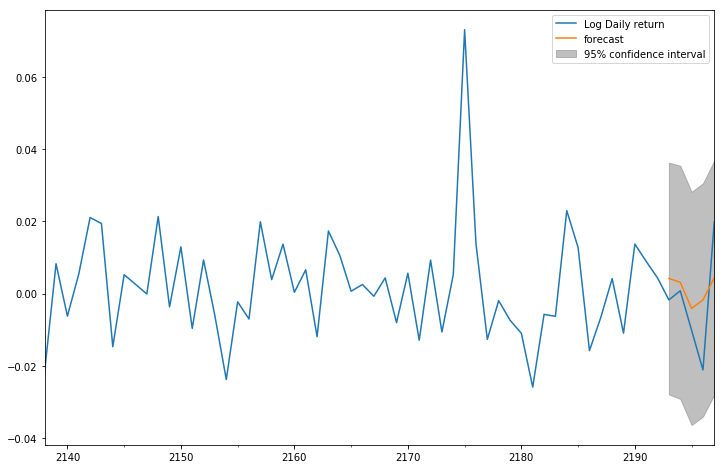

In [6]:
Names=['GOOG']
for name in Names:
    with open(name+'.csv') as file:
        reader=csv.reader(file)
        rows=[row for row in reader]
    Y={}
    DY={}
    DY_2={}
    DY_3={}
    Y['Log Daily return']=[np.log(float(rows[i][1])/float(rows[i-1][1])) for i in range(2,len(rows))]
    Y=pd.DataFrame(data=Y)
    Y.index = pd.Index(sm.tsa.datetools.dates_from_range('1701', '2200'))
    DY['First Difference Log Daily return']=[float(Y.iloc[i]-Y.iloc[i-1]) for i in range(1,len(Y))]
    DY=pd.DataFrame(data=DY)
    DY_2['Second Differene Log Daily return']=[float(DY.iloc[i]-DY.iloc[i-1]) for i in range(1,len(DY))]
    DY_2=pd.DataFrame(data=DY_2)
    DY.index = pd.Index(sm.tsa.datetools.dates_from_range('1702', '2200'))
    DY_2.index = pd.Index(sm.tsa.datetools.dates_from_range('1703', '2200'))
    Qs=Ps=[0,1,2,3,4]
    Ys=[Y,DY,DY_2]
    results={}
    for y, d in zip(Ys,Qs):
        for q in Qs:
            for p in Ps:
                try:
                    results[(d,p,q)]=(ARMA(y,(p,q)).fit().aic,ARMA(y,(p,q)).fit().bic)
                except:
                    None
fig, ax = plt.subplots(figsize=(12, 8))
ax = Y.loc['2138':'2197'].plot(ax=ax)
fig = ARMA(Y.loc[:'2192'],(4,3)).fit().plot_predict('2193', '2197', dynamic=True, ax=ax, plot_insample=False)
plt.show()
